In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential as Seq
from keras import layers
import seaborn as sns
import random

In [2]:
def maping(x):
    return np.exp(-x)

In [3]:
X = []
Y = []

In [4]:
for _ in range(100):
    x = np.random.randn(2,)
    y = sum(list(map(maping, x)))
    X.append(x)
    Y.append(y)

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
X.shape

(100, 2)

In [7]:
class Dense_layer:

    def __init__(self, n_neurons):
        # self.input = input
        self.has_initialized = False
        self.n_neurons = n_neurons
        # self.weights = np.random.randn(n_neurons,input.shape[1])
        # self.bias = np.random.randn()

    def forward_propagation(self, input):
        if not self.has_initialized:
            self.weights = np.random.randn(self.n_neurons,input.shape[1])
            self.bias = np.random.randn()
            self.has_initialized = True
        self.input = input
        self.output = (np.dot(self.weights, input.T) + self.bias).T

    def backward_propagation(self, dvalues):
        self.dweights = dvalues.T.dot(self.input)
        self.dinputs = dvalues.dot(self.weights)
    
    def update(self):
        # print(self.weights)
        # print(self.dweights)
        self.weights += (self.dweights*(-0.001))
        # print(self.weights)
        # return dvalues.T.dot(self.input)

In [8]:
class MeanSquaredLoss:

    def __init__(self, y):
        self.y = y
    
    def forward_propagation(self, input_val):
        self.loss = np.sqrt(((input_val-self.y)**2).sum()/len(self.y))
        self.input = input_val
        print(f'Current Loss: {self.loss}')

    def backward_propagation(self):
        self.dinputs = -2*(self.y-self.input)/len(self.y)
        self.dinputs = self.dinputs.reshape((self.dinputs.shape[0],1))
        # print(self.dinputs)

In [9]:
class Relu_layer:

    def forward_propagation(self,input):
        input = input.copy()
        input[input<0] = 0
        self.output = input
    
    def backward_propagation(self, input):
        input = input.copy()
        # input[input<0] = 0
        # input[input>0] = 1
        self.dinputs = np.heaviside(input,0)

    def update(self):
        pass

In [15]:
class Sequential:

    def __init__(self, layers):
        self.layers = layers
        self.layers_rev = layers[::-1]

    def fit(self, x, y, no_of_epochs):
        # self.__initialize(x,y)
        history = dict({
            'loss':[]
        })
        for _ in range(no_of_epochs):

            for idx, layer in enumerate(self.layers):
                if idx==0:
                    layer.forward_propagation(x)
                else:
                    layer.forward_propagation(self.layers[idx-1].output)

            for idx, layer in enumerate(self.layers_rev):
                if idx==0:
                    history['loss'].append(layer.loss)
                    layer.backward_propagation()
                else:
                    layer.backward_propagation(self.layers_rev[idx-1].dinputs)
                    layer.update()
            
        return history
                    # print(layer.weights)

    # def __initialize(self, x, y):
    #     for idx, layer in enumerate(self.layers):
    #         if idx==0:
    #             layer


In [16]:
Y = Y.reshape((Y.shape[0], 1))

In [32]:
model = Sequential([
    Dense_layer(4),
    # Relu_layer(),
    Dense_layer(1),
    MeanSquaredLoss(Y)
])


In [33]:
history = model.fit(X,Y, 400)

Current Loss: 2.7037147746685726
Current Loss: 2.6821496137267475
Current Loss: 2.66096269484162
Current Loss: 2.640146032814852
Current Loss: 2.6196918885463125
Current Loss: 2.599592758222614
Current Loss: 2.579841363063908
Current Loss: 2.560430639597081
Current Loss: 2.541353730425569
Current Loss: 2.522603975467902
Current Loss: 2.50417490363887
Current Loss: 2.4860602249488206
Current Loss: 2.4682538229981534
Current Loss: 2.4507497478454563
Current Loss: 2.43354220922908
Current Loss: 2.416625570123141
Current Loss: 2.3999943406101054
Current Loss: 2.3836431720531515
Current Loss: 2.3675668515525143
Current Loss: 2.3517602966709217
Current Loss: 2.336218550414108
Current Loss: 2.3209367764531814
Current Loss: 2.305910254576385
Current Loss: 2.2911343763584844
Current Loss: 2.276604641036671
Current Loss: 2.2623166515825033
Current Loss: 2.248266110959945
Current Loss: 2.234448818560148
Current Loss: 2.22086066680409
Current Loss: 2.2074976379046762
Current Loss: 2.19435580078035

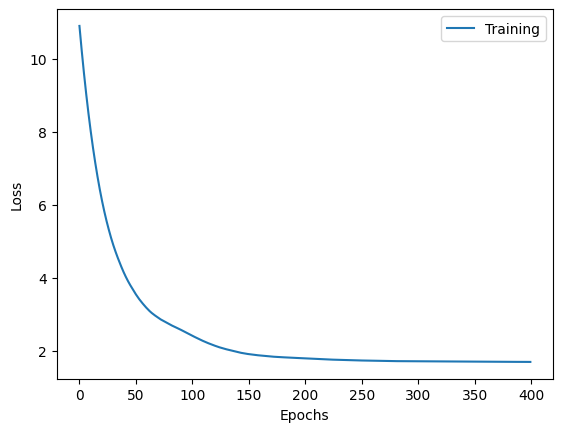

In [21]:
plt.plot(range(len(history['loss'])), history['loss'], label="Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best')
# plt.title(label)

In [268]:
x_valid = np.array([5,6])

In [269]:
np.array(list(map(maping, x_valid))).sum()

1100

In [270]:
x_validn = np.array([x_valid])
x_validn.shape

(1, 2)

In [271]:
layer1 = model.layers[0]
layer2 = model.layers[1]

In [272]:
layer1.forward_propagation(x_valid)

In [273]:
layer2.forward_propagation(layer1.output)

In [274]:
layer2.output

array([1098.51448243])

In [52]:
model.layers

In [34]:
model2 = Seq([
    layers.Dense(4),
    layers.Dense(1)
])

model2.compile(loss="mean_squared_error")

In [35]:
history = model2.fit(X,Y, epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 5ms/step - loss: 18.0989
Epoch 2/400
4/4 [==============================] - 0s 5ms/step - loss: 17.7694
Epoch 3/400
4/4 [==============================] - 0s 6ms/step - loss: 17.4918
Epoch 4/400
4/4 [==============================] - 0s 7ms/step - loss: 17.2991
Epoch 5/400
4/4 [==============================] - 0s 6ms/step - loss: 17.1210
Epoch 6/400
4/4 [==============================] - 0s 5ms/step - loss: 16.9573
Epoch 7/400
4/4 [==============================] - 0s 7ms/step - loss: 16.7952
Epoch 8/400
4/4 [==============================] - 0s 5ms/step - loss: 16.6279
Epoch 9/400
4/4 [==============================] - 0s 6ms/step - loss: 16.4876
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 16.3356
Epoch 11/400
4/4 [==============================] - 0s 6ms/step - loss: 16.1754
Epoch 12/400
4/4 [==============================] - 0s 5ms/step - loss: 16.0413
Epoch 13/400
4/4 [==============================]

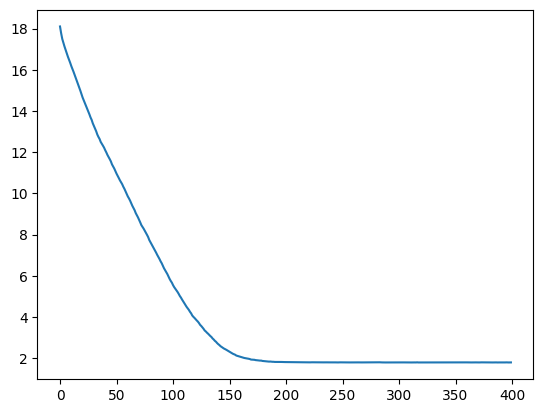

In [37]:
plt.plot(range(len(history.history['loss'])),history.history['loss'] )